#Customers Clustring : Unsupervised Learning

##Introduction
This project aims to analyse the and describe the variation of type of customer helping the distributors to get insight about how the would stucture their delivery service to meet the needs of customers.
the Dataset [Wholesales+customers](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers),containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories.
The features: "**Channel**" & "**Region**" will be excluded in the analysis of this projrect.


In [4]:
## packeges import
import pandas as pd
import numpy as np
from IPython.display import display

## notebook display
%matplotlib inline

#import the dataset
data=pd.read_csv("Wholesale customers data.csv")
data.drop(['Region','Channel'],axis=1,inplace=True)
print(data.head())
print('we have {} exemples in our dataset'.format(data.shape[0]))

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185
we have 440 exemples in our dataset


## Data Exploration
In this section we will begin exploration for data to understand the relation between the features.
we have '**Frech**',  '**Milk**',  '**Grocery**',  '**Frozen**',  '**Detergents_Paper**' &  '**Delicassen**', present the products categories

In [5]:
### statistical description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


we can say that our features has an interest variation, due to the different customers categories( Cafe, Restaurant..)

### Features Relevant

In this section we will verify that we can determine wethere a customer purchacing of one category will casually led to purchase some proportional amount of onther category of product.
supervised learning with linearRegression for a subset of features with one feature removed, and then score how well that model can predict the removed feature.

use '**Detergents_Paper**' like an exemple

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as dtr
## predictor data with 'Fresh' variable removed
X=data.drop(['Detergents_Paper'],axis=1,inplace=False)
y=data['Detergents_Paper']

##train and test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=dtr(random_state=42).fit(X_train,y_train)

#score of our training
score=model.score(X_test,y_test)
print(score)

0.2628025637283339


We find R²=0.262 the predicted score that is not much that good to predict how a customer would spend in 'Detergents_Paper' based o, the other features present in the data, and we can say that the ***Detergents_Paper***( the annual spending on grocery product) have some correlation with the other features.
we conclude that the 'Grocery' prediction is necessary for identifying customer's spending habits, One feature add extra info to the data which is not easly inferable by the model only through looking to the other features

###Correlation & Distribution Visualization
We will create 'pairplot' of each of the six product features present in the data, to get a better understanding of the data.
The pairplot show correlation between one feature and the others===> this feature may be relevent for identifying a sepecifc customer and vice versa. 

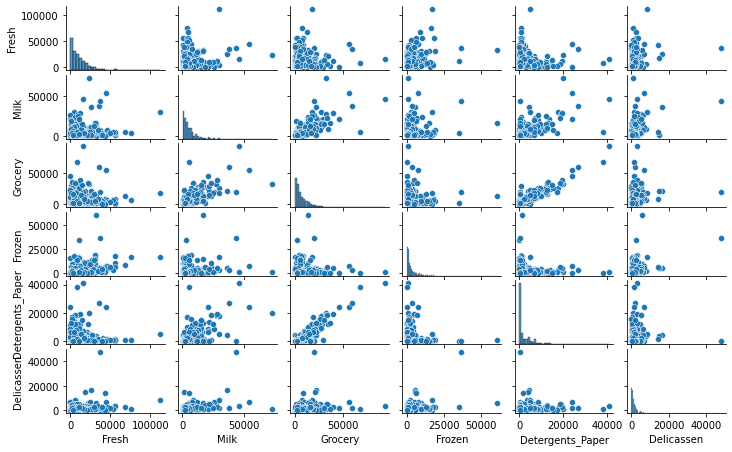

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.pairplot(data=data)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

####Distibution:
All the feature has a strong left skewed distribution, the most of the data fall in the first intervalls, and we can see this in the statistical description that there are a sginificant diiferent between the mean and the median, so can expect some outliers and we need to regulate the scaling.

####Correlation:
we observe that the majority of the features have not a significant correlation between them. 

##Data Preprocessing

###Data Scaling
we see that we have a huge diffrences between the data values in the customer features and the data is not normally distributed.
we will use **log_scaling** transformation so we can handle and reduce the skewness of the variance and make the analysis more meaningful and sgnificant. 

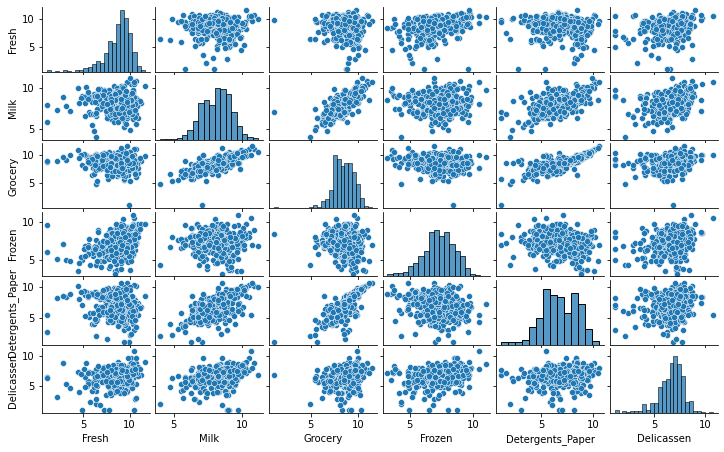

In [8]:
#Scale the data using the normal logarithm
scalled_data =data.apply(lambda x:np.log(x))

#Visualize the transformed data
t=sns.pairplot(scalled_data)
t.fig.set_figheight(6)
t.fig.set_figwidth(10)

we see that the distribution of the features is now almost normal after aplaying the normal logarithm.

###Handling Outliers
Outliers can extremely influence the skewness of the data points, we need to construct a way to detect those outliers of each of customer features and we will handel those wich accur on all the features.
There are many techniques to detect outlires, here we will use the statistical method called [interquartile range (IQR)](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/://), so every point out of the range it will be concidered as an outlier. 

In [9]:
## create a list to grape the outliers of the different features
outliers=[]
features=list(scalled_data.columns)
for feature in features:
##defining the Q1 & Q3 the first and the third quantiles
    Q1= np.percentile(scalled_data,25)
    Q3= np.percentile(scalled_data,75)
    
##defining the IQR interval 
    IQR= Q3-Q1

## the interval is: [Q1 - IQR*1.5, Q3 + IQR*1.5]

    outlier= scalled_data[(scalled_data[feature]<=Q1 - IQR*1.5)|(scalled_data[feature]>=
    Q3 + IQR*1.5)]
    outlier=list(outlier.index)
    print('the outliers of "{}" feature has the outliers:'.format(feature))
    display(outlier)
    outliers=outliers+ outlier
    print("***************************************************")

## outliers that apear in multiple features

out=[]
for x in outliers:
   if outliers.count(x)>1:
     out.append(x)
out=[*set(out)]
### the last list od outliers that we should handle 
print("the last list od outliers that we should handle: " )
display(out)




the outliers of "Fresh" feature has the outliers:


[66, 95, 96, 218, 338]

***************************************************
the outliers of "Milk" feature has the outliers:


[]

***************************************************
the outliers of "Grocery" feature has the outliers:


[75]

***************************************************
the outliers of "Frozen" feature has the outliers:


[38, 65, 420]

***************************************************
the outliers of "Detergents_Paper" feature has the outliers:


[75, 122, 142, 154, 161, 177, 204, 237, 289, 338, 356, 402]

***************************************************
the outliers of "Delicassen" feature has the outliers:


[66, 109, 128, 137, 142, 154, 184, 187, 203, 233, 285, 289]

***************************************************
the last list od outliers that we should handle: 


[289, 66, 75, 142, 338, 154]

we have 5 outliers that appear in multiple features by the IQR method, so we can delete theme to avoid such skewness impact on the data points.

In [10]:
##delete the outliers
Clean_data=scalled_data.drop(scalled_data.index[out])

##Data Transformation

###PCA
here we will use the Principal component analysis (PCA) technique to find the features's combinations that best describe the customers needs.
PCA technique itend to find dimensions that will summarize the features while retaining as much information as possible using *explained variance ratio* to keep just which maximize this ratio,  (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.
we have 'clean_data' already scalled and without any stonge outliers so we can apply PCA transformation to it.

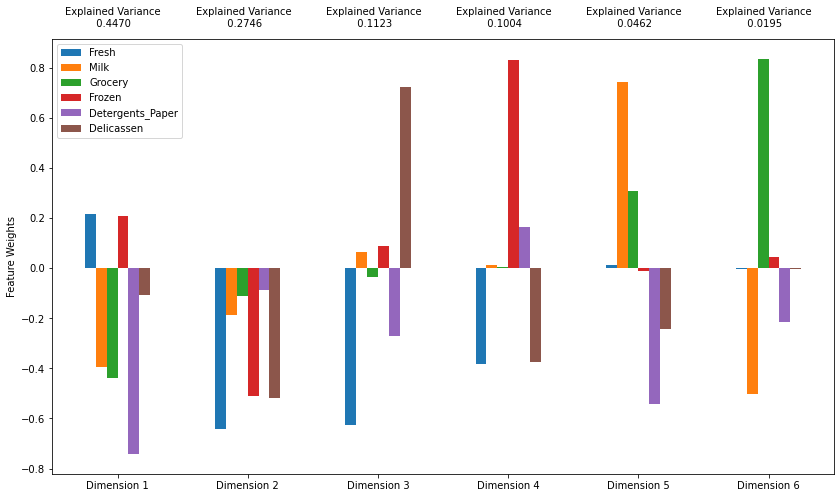

In [11]:
from sklearn.decomposition import PCA

pca_data= PCA().fit(Clean_data)

'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca_data.components_)+1)]  

	# PCA components
components = pd.DataFrame(np.round(pca_data.components_, 4), columns = Clean_data.keys())
components.index = dimensions		

	# PCA explained variance
ratios = pca_data.explained_variance_ratio_.reshape(len(pca_data.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

	# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
for i, ev in enumerate(pca_data.explained_variance_ratio_):
	ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))


the 'Dimension 1' & 'Dimension2' can explain 70.8% of the data in total.
So here we can reduce the dimensionality of the dataset by keeping just the 2 first components to reduce the complexity and making data visualized.

In [12]:
##let create the reduced data  from the Clean_data

##first thing we should fit it with 2 components
pca=PCA(n_components=2).fit(Clean_data)

##now we create the transformed data
reduced_data= pca.transform(Clean_data)
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data.head()

,Dim1,Dim2
0,-1.702278,-0.048985
1,-1.685878,-0.942211
2,-1.712516,-1.767097
3,1.294483,-1.363849
4,-0.568331,-2.460165


####Biplot

Text(0.5, 1.0, 'PC plane with original feature projections.')

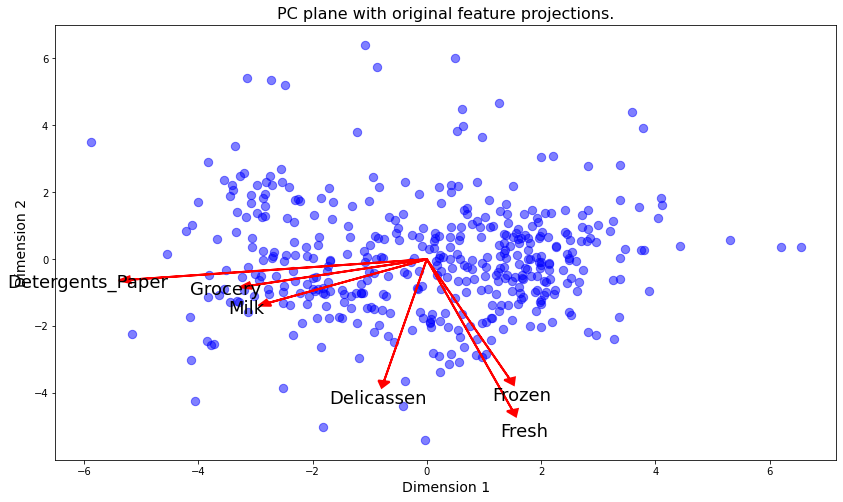

In [13]:
fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
ax.scatter(x=reduced_data.loc[:, 'Dim1'], y=reduced_data.loc[:, 'Dim2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
for i, v in enumerate(feature_vectors):
    ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
    ax.text(v[0]*text_pos, v[1]*text_pos, Clean_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PC plane with original feature projections.", fontsize=16)

So now that we have PCA dimensions with the original features projection, we can see that there is a category of customer that tends to buy 'Milk', 'Grocery', & 'Datergents_Paper' more than the other features.

##K-Means Clustring

[K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes; and to identify the various customer segments hidden in the data.
whene we assing choose a number of clusters we do not know if is the best segments of data, since it is unclear what structure exists in the data, so that why we will use [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) as our metric, Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.Also we will use [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) to detect the right number of clusters

###Elbow plot

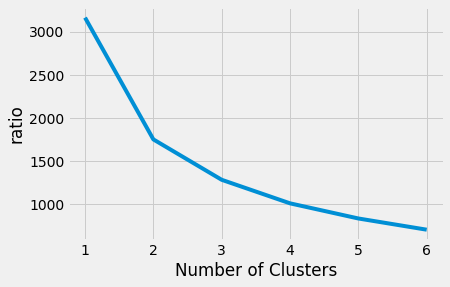

In [14]:
from sklearn.cluster import KMeans
#constructe the kmean model with the specifics args and train it for a range of cluster's numbers
Kmean_kwargs= {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42
}
ratio=[]
for k in range(1,7):
  kmean=KMeans(n_clusters=k,**Kmean_kwargs)
  kmean.fit(reduced_data)
  ratio.append(kmean.inertia_)

##elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1, 7), ratio)
plt.xticks(range(1, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("ratio")
plt.show()

After observing the elbow plot we  crealy see that it start to converge at **2**, so we can say that our customers could be devided to 2 general clusters

###Silhouette Score 

In [15]:
from sklearn.metrics import silhouette_score

for k in range(2,7) :

  clusters=KMeans(n_clusters=k,**Kmean_kwargs)

  #fit the cluster for each piont in the Clean_data

  clusters.fit(reduced_data)

  

  # Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(Clean_data,clusters.labels_)

  print("the silhouette score for {} clusters is : {}".format(k,score))


the silhouette score for 2 clusters is : 0.3077204023682066
the silhouette score for 3 clusters is : 0.26670976847328626
the silhouette score for 4 clusters is : 0.19376255890839342
the silhouette score for 5 clusters is : 0.1947438527631604
the silhouette score for 6 clusters is : 0.1943447238064955


Also the *Silhoutte score* confirmes that the are 2 Clusters.

In [16]:
##we will assing the data to the 2 Clusters

kmean_2=KMeans(n_clusters=2,**Kmean_kwargs)
kmean_2.fit(reduced_data)

#the centers of the centers
centers=kmean_2.cluster_centers_
print('the Clusters centers :\n',centers)
## create predicted data on Clean_data
preds=kmean_2.predict(reduced_data)

the Clusters centers :
 [[-2.18167337  0.10892975]
 [ 1.48827331 -0.07430866]]


In [17]:
##update reduced_data with cluster's labels
reduced_data['label']=preds.tolist()
reduced_data.head()

,Dim1,Dim2,label
0,-1.702278,-0.048985,0
1,-1.685878,-0.942211,0
2,-1.712516,-1.767097,0
3,1.294483,-1.363849,1
4,-0.568331,-2.460165,0


###Clusters Visualizing

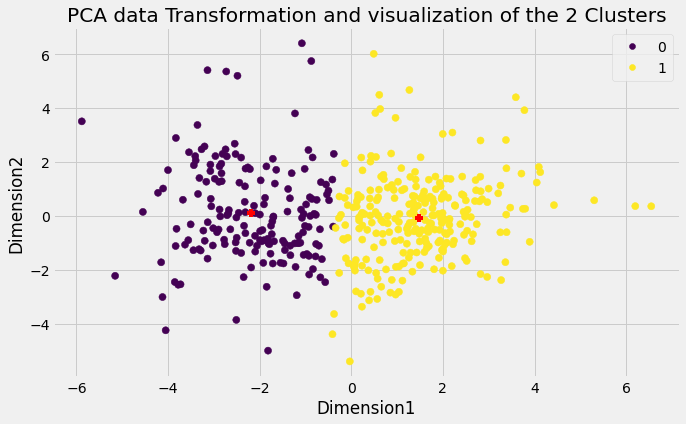

In [18]:

##plot the reduced data with 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

scatter = ax.scatter(reduced_data['Dim1'], reduced_data['Dim2'], c=reduced_data['label'], s=50)
ax.legend(*scatter.legend_elements())


for i, j in centers:
   sc=ax.scatter(i, j, s=50, c='red', marker='+')
   
plt.title(('PCA data Transformation and visualization of the 2 Clusters'))
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')

plt.show()

The centrois of each cluster (red points), represent the *avrages* of all the data points assinged in the respective cluster, that represent the avrage customer spending in that cluster.
 Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

###Segmentation

In [19]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3716.0,7983.0,12283.0,895.0,4638.0,974.0
Segment 1,9167.0,1940.0,2494.0,2100.0,310.0,724.0


Here we observe the total mean purchace of each product in the 2 customer's categories, we could conclude that:

1.   **Segment_0**: this category may represent SuperMarkets, wich spend a lot in Milk, Grocery, Detergents_Paper it's probably due to the have space for stocks.
2.   **Segment_1**: this category may represent cafeshops or restaurants,Their spend on Fresh, and Frozen is higher





##Conclusion & Insights



1. The customer segments, may be affected differently by a specific delivery.
2. The two clusters represent different types of customers, so their delivery needs might be different.
3. we can consider 'customer segment' as an engineered feature for the data.
4. Know how new customers provided estimates for anticipated annual spending of each product category.
5. Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively.
6. To label the new customers, we will need to build and train a supervised learner on the data that we labeled through clustering.





##References

https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python

https://stackoverflow.com/questions/67157280/using-seaborn-displot-i-am-unable-to-specify-the-hue-to-separate-three-categorie

https://sukhbinder.wordpress.com/2016/03/02/biplot-in-python-revisited/

https://plotly.com/python/pca-visualization/

https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d#:~:text=PCA%20is%20defined%20as%20an,second%20coordinate%2C%20and%20so%20on.